# Проект: Исследование стартапов

- Автор: Юрий Кузнецов
- Дата: 05.03.2025

## Введение

Заказчиком исследования является финансовая компания предоставляющая льготные займы и желающая войти на рынок инвестиций в новые перспективные области бизнеса. Необходимо выработать общее понимание модели бизнеса по покупке, развитию и последующей перепродаже стартапов. Определить какая информация может быть полезна для прогнозирования успешности инвестиций. В наличии имеются разрозненные и неполные исторические данные. 
Цель проекта провести анализ этой информации, оценку ее корректности, возможных искажений и выявления показателей и признаков, которые указывают на повышенную вероятность успешной сделки по покупке компании.
Для этого необходимо подготовить датасет и проверить данные в нем, а также ответить на вопросы заказчика как о предобработке, так и о значеиданных для бизнеса.
В распоряжении имеется несколько таблиц с различной информацией:
- `acquisition` о покупках одними компаниями других компаний
- `company_and_rounds` о компаниях и раундах финансирования
- `people` о сотрудниках
- `education` об образовании сотрудника
- `degrees` о типе образования сотрудника
- `fund` о фондах 
- `investment` о раундах инвестирования

В данном исследовании предполагается оценить со структуру, полноту и корректность информации, провести предобработку и подготовку данных, затем провести анализ этих данных с целью ответить на вопросы заказчика:

- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.

В результате исследования, на основании полученных результатов, сформулировать выводы и рекомендации чтобы помочь заказчику определить стратегию ведения успешного бизнеса.
 


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv

###  Вывод общей информации, исправление названия столбцов

Начнем с загрузки всех необходимых библиотек для работы с данными

In [1]:
#phik для построения матрицы корреляции
try:
    !pip install phik 
except:
    display('Oops!!! phik failed')

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import numpy as np

Загрузим датасеты 
- `acquisition.csv`
- `company_and_rounds.csv`
- `people.csv`
- `education.csv`
- `degrees.csv`

- `fund.csv`
- `investment.csv`


In [3]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')                             
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')                             
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
                         
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv') 


####  Датасет df_acquisition

In [4]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `df_acquisition` содержит 9407 сток и 6 столбцов. Все названия столбцов имеют корректный формат.
- можно понизить разряднось числового типа столбцов `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` 
- `acquired_at` содержит даты, нужно привести к типу 'datetime' 

####  Датасет df_company_and_rounds

In [6]:
df_company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `df_company_and_rounds` содержит 217774 сток и 22 столбца. 
- названия столбцов необходимо привести к формату snake_case 
- значения столбцов с числовыми данными привести к типу Int64
- `funded  at`, `founded  at`, `closed at` к типу даты
- `is  last  round`, `is  first  round`, `participants`, `funding rounds`, `investment rounds`, `milestones` привести к целочисленному типу

#### Датасет df_people

In [8]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


В датасете `df_people` 226709 столбцов и 5 строк. Названия столбцов корректны
- ``company_id` привести к типу 'Int64' 

#### Датасет df_education

In [10]:
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `df_education` содержит 109610 строк и 4 столбца. Все названия корректны
- `id` и `person_id` привести к типу 'int' с понижением разрядности
- `graduated_at` к типу даты

#### Датасет df_degrees

In [12]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [13]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `df_degrees` состоит из 109610 строк и 4 столбцов, названия имеют корректный формат 
- столбец `id` и `object_id` привести к типу 'int' с понижением разрядности

#### Датасет df_fund

In [14]:
df_fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [15]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет `df_fund` имеет 11652 строк и 9 столбцов, названия в стиле snake_case
- `founded_at` к дате

#### Датасет df_investment

In [16]:
df_investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [17]:
df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


`df_investment` содержит 61403 строк и 4 столбца. Названия столбцов в корректном формате

### Смена типов и анализ пропусков

#### Датасет `df_acquisition` 
- значения столбцов с числовыми данными приведем к типу int с понижением разрядности


In [18]:
for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']:
    df_acquisition[column] = df_acquisition[column].astype('Int64')

- `acquired_at` содержит даты, нужно привести к типу 'datetime' 

In [19]:
df_acquisition['acquired_at']=pd.to_datetime(df_acquisition['acquired_at'])

In [20]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   Int64         
 1   acquiring_company_id  9407 non-null   Int64         
 2   acquired_company_id   9407 non-null   Int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   Int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: Int64(4), datetime64[ns](1), object(1)
memory usage: 477.8+ KB


In [21]:
missing_df_acquisition = (pd.DataFrame({'Кол-во пропусков': df_acquisition.isnull().sum(), 
                                        'Процент пропусков': round(df_acquisition.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_acquisition

,Кол-во пропусков,Процент пропусков
term_code,7576,80.500000
acquired_at,29,0.300000
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


- ПРОПУСКИ в столбце `term_code` варианты расчета

In [22]:
df_acquisition['term_code'].value_counts()

term_code
cash              1195
cash_and_stock     427
stock              209
Name: count, dtype: int64

cash - наличные, stock - акции. Данный столбец не несет существенной информации, так как есть price_amount - стоимость

`acquired_at` дата сделки имеет незначительное количество пропусков

#### Датасет `df_company_and_rounds`  

In [23]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

- названия столбцов приводим к формату snake_case 

In [24]:
df_company_and_rounds.columns = [col.replace(' ', '_') for col in df_company_and_rounds.columns]
df_company_and_rounds.columns = [col.replace('__', '_') for col in df_company_and_rounds.columns]

- значения числовых столбцов приведем к типу Int64

In [25]:
for column in ['company_ID', 'company_id', 'funding_round_id', 'investment_rounds', 'funding_rounds', 
               'funding_total', 'milestones', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']:
    df_company_and_rounds[column] = df_company_and_rounds[column].astype('Int64')

In [26]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   company_ID           217472 non-null  Int64 
 1   name                 217471 non-null  object
 2   category_code        143886 non-null  object
 3   status               217472 non-null  object
 4   founded_at           109956 non-null  object
 5   closed_at            3449 non-null    object
 6   domain               147159 non-null  object
 7   network_username     95534 non-null   object
 8   country_code         108607 non-null  object
 9   investment_rounds    217472 non-null  Int64 
 10  funding_rounds       217472 non-null  Int64 
 11  funding_total        217472 non-null  Int64 
 12  milestones           217472 non-null  Int64 
 13  funding_round_id     52928 non-null   Int64 
 14  company_id           52928 non-null   Int64 
 15  funded_at            52680 non-nul

- `funded_at`, `founded_at`, `closed_at` к типу даты

In [27]:
for column in ['funded_at', 'founded_at', 'closed_at']:
    df_company_and_rounds[column] = pd.to_datetime(df_company_and_rounds[column])

 - `company_ID` и `company_id` столбцы с уникальными идентификаторами компаний значения которых совпадают, но по отдельности столбцы имеют пропуски в разных строках. Заполним пустые значения в этих столбцах

In [28]:
df_company_and_rounds['company_ID']=df_company_and_rounds['company_ID'].fillna(df_company_and_rounds['company_id'])
df_company_and_rounds['company_ID']=df_company_and_rounds['company_id'].fillna(df_company_and_rounds['company_ID'])

In [29]:
(df_company_and_rounds['company_ID']==df_company_and_rounds['company_id']).nunique()

1

Эти столбцы теперь идентичны и один из них можно удалить. Оставим первый

In [30]:
df_company_and_rounds = df_company_and_rounds.drop('company_id', axis=1)

In [31]:
df_company_and_rounds.rename(columns={'company_ID': 'company_id'}, inplace=True)

In [32]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  Int64         
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [33]:
missing_df_company_and_rounds = (pd.DataFrame({'Кол-во пропусков': df_company_and_rounds.isnull().sum(), 
                                        'Процент пропусков': round(df_company_and_rounds.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_company_and_rounds

,Кол-во пропусков,Процент пропусков
closed_at,214325,98.400000
funded_at,165094,75.800000
is_last_round,164846,75.700000
funding_round_type,164846,75.700000
is_first_round,164846,75.700000
participants,164846,75.700000
pre_money_valuation,164846,75.700000
raised_amount,164846,75.700000
funding_round_id,164846,75.700000
network_username,122240,56.100000


- ПРОПУСКИ. По видимому датасет `df_company_and_rounds` результат объединения двух датасетов, 217774 строк в одном с информацией о компаниях и 52928 в другом с информацией о раундах финансирования, которые примерно в 4 раза отличаются по объему данных
- `closed_at` дата закрытия компании, пропуски означают, что компания не закрыта
- `founded at` дата инвестирования, пропусков примерно половина
- `category_code` категория области деятельности компании, пропусков примерно треть.
- `domain` официальный сайт компании. пропусков примерно треть.
- `country_code` код страны компании. пропусков примерно половина
- `network_username` ник компании в сети. Более половины пропусков

#### Датасет df_people

- `id` и `company_id` приведем к типу Int64

In [34]:
df_people['company_id'] =  df_people['company_id'].astype('Int64')

In [35]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


- `id` и `person_id` к типу Int64

In [36]:
for column in ['id', 'person_id']:
    df_education[column] = df_education[column].astype('Int64')

- `graduated_at` к типу даты

In [37]:
df_education['graduated_at']=pd.to_datetime(df_education['graduated_at'])

In [38]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  Int64         
 1   person_id     109610 non-null  Int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), object(1)
memory usage: 3.6+ MB


In [39]:
missing_df_education= (pd.DataFrame({'Кол-во пропусков': df_education.isnull().sum(), 
                                        'Процент пропусков': round(df_education.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_education

,Кол-во пропусков,Процент пропусков
graduated_at,51556,47.000000
instituition,55,0.000000
id,0,0.000000
person_id,0,0.000000


- ПРОПУСКИ
- `graduated_at` дата получения образования. Возможно пропуски обусловлены тем, что обучение еще не закончено.

#### Датасет `df_degrees` 


- столбец `object_id` привести к типу Int64

In [40]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [41]:
df_degrees['object_id']=df_degrees['object_id'].str.extract(r"(-?\d+\.?\d*)")
df_degrees['object_id']=df_degrees['object_id'].astype(float).astype('Int64')

In [42]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  Int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: Int64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [43]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [44]:
missing_df_degrees= (pd.DataFrame({'Кол-во пропусков': df_degrees.isnull().sum(), 
                                        'Процент пропусков': round(df_degrees.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_degrees

,Кол-во пропусков,Процент пропусков
subject,28312,25.800000
degree_type,11221,10.200000
id,0,0.000000
object_id,0,0.000000


- ПРОПУСКИ
- `degree_type` пропуски возможно указывают на отсутствие образования
- `subject` специальность. Вероятно не все указывают свою специальность

#### Датасет `df_fund`



- Приведем числовые данные к типу Int64

In [45]:
for column in ['id', 'investment_rounds', 'invested_companies', 'milestones']:
    df_fund[column] = df_fund[column].astype('Int64')

- `founded_at` к дате

In [46]:
df_fund['founded_at']=pd.to_datetime(df_fund['founded_at'])

In [47]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  Int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  Int64         
 7   invested_companies  11652 non-null  Int64         
 8   milestones          11652 non-null  Int64         
dtypes: Int64(4), datetime64[ns](1), object(4)
memory usage: 864.9+ KB


In [48]:
missing_df_fund= (pd.DataFrame({'Кол-во пропусков': df_fund.isnull().sum(), 
                                        'Процент пропусков': round(df_fund.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_df_fund

,Кол-во пропусков,Процент пропусков
network_username,9503,81.600000
founded_at,7047,60.500000
country_code,4599,39.500000
domain,4290,36.800000
name,3,0.000000
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


- ПРОПУСКИ

#### Датасет `df_investment` 


- все столбцы к типу Int64

In [49]:
for column in ['id', 'funding_round_id', 'company_id', 'fund_id']:
    df_investment[column] = df_investment[column].astype('Int64')

In [50]:
df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  Int64
 1   funding_round_id  61403 non-null  Int64
 2   company_id        61403 non-null  Int64
 3   fund_id           61403 non-null  Int64
dtypes: Int64(4)
memory usage: 2.1 MB


`Выводы`

На этом шаге вывели общую информацию о датасетах, оценили их объем, корректность данных и названий

In [51]:
datasets = pd.DataFrame({
'df_acquisition': df_acquisition.shape,
'df_company_and_rounds': df_company_and_rounds.shape,
'df_people': df_people.shape,
'df_education': df_education.shape,
'df_degrees': df_degrees.shape,
'df_fund': df_fund.shape,   
'df_investment': df_investment.shape  
})
datasets.index = ['Число строк', 'Число столбцов']
datasets

,df_acquisition,df_company_and_rounds,df_people,df_education,df_degrees,df_fund,df_investment
Число строк,9407,217774,226709,109610,109610,11652,61403
Число столбцов,6,21,5,4,4,9,4


- Обработаны типы данных
- Названия столбцов приведены к общему формату
- Данные датасетов неполны, однако их достаточно для решения задач проекта

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


Для начала нужно понять что есть типичное значение суммы финансирования за один раунд. Выведем статистические показатели столбца `raised_amount`

In [52]:
df_company_and_rounds['raised_amount'].describe()

count            52928.0
mean      7946092.255611
std      42168205.893085
min                  0.0
25%             246330.0
50%            1600000.0
75%            6700000.0
max         3835050000.0
Name: raised_amount, dtype: Float64

Среднее значение сильно отличается от медианы. Посмотрим распределение значений

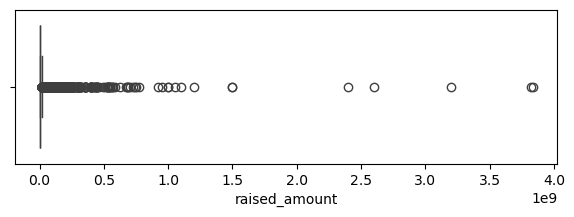

In [53]:
plt.figure(figsize=(7, 2))
sns.boxplot(data=df_company_and_rounds, x= 'raised_amount')
plt.show()

Видно наличие небольшого числа экстремально высоких "нетипичных" значений `raised_amount`, которые существенно завышают среднее.
Поэтому для типичного значения будем использовать медиану. 

Отфильтруем датасет по 0,95 квантилю и нулевым значениям

In [54]:
outfliers_filtered = df_company_and_rounds[(df_company_and_rounds['raised_amount']<
                                           df_company_and_rounds['raised_amount'].quantile(0.95))&
                                           (df_company_and_rounds['raised_amount']>0)]

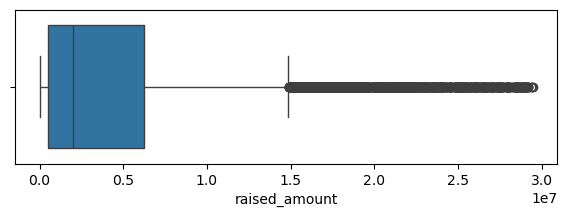

In [55]:
plt.figure(figsize=(7, 2))
sns.boxplot(data=outfliers_filtered, x= 'raised_amount')
plt.show()

In [56]:
outfliers_filtered['raised_amount'].describe()

count           44280.0
mean     4573310.756662
std      5916976.696827
min               291.0
25%            500000.0
50%           2000000.0
75%           6250000.0
max          29460800.0
Name: raised_amount, dtype: Float64

Статистические  показатели более корректны

Создадим столбец с годом финансирования `year`

In [57]:
outfliers_filtered['year']=outfliers_filtered['funded_at'].dt.year.astype('Int64')

C:\Users\urize\AppData\Local\Temp\ipykernel_13884\253274695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outfliers_filtered['year']=outfliers_filtered['funded_at'].dt.year.astype('Int64')


Сгруппируем данные по годам `year` и медианным суммам финансирования `raised_amount` в датафрейм `df_year_rounds_amounts`, при этом отфильтруем нулевые значения

In [58]:
df_year_rounds_amounts = outfliers_filtered.groupby('year')['raised_amount'].agg(['count', 'median']).reset_index()

In [59]:
# отфильтруем сгруппированный датафрейм по значениям числа раундов, оставим более 50
df_year_rounds50_amounts = df_year_rounds_amounts[df_year_rounds_amounts['count']>50]

In [60]:
# переименуем столбцы
df_year_rounds50_amounts=df_year_rounds50_amounts.rename(columns= {'year': 'Год', 'count': 'Число раундов', 'median': 'Типичная сумма за 1 раунд'})
# Задаем читаемый формат суммы финансирования
df_year_rounds50_amounts_MS = df_year_rounds50_amounts.style.format({'Типичная сумма за 1 раунд' : lambda x: f'{x / 1000000:.2f}M$'})

df_year_rounds50_amounts_MS

,Год,Число раундов,Типичная сумма за 1 раунд
12,1999,55,3.00M$
13,2000,87,5.00M$
14,2001,68,4.52M$
15,2002,92,5.00M$
16,2003,128,4.25M$
17,2004,239,5.20M$
18,2005,1478,5.66M$
19,2006,2178,5.00M$
20,2007,2746,4.00M$
21,2008,3078,3.79M$


Построим линейный график зависимости типичной суммы выделенных средств финансирования стартапов за один раунд от года, на котором отобразим информацию для тех лет когда число раундов превышало 50

<Figure size 640x480 with 0 Axes>

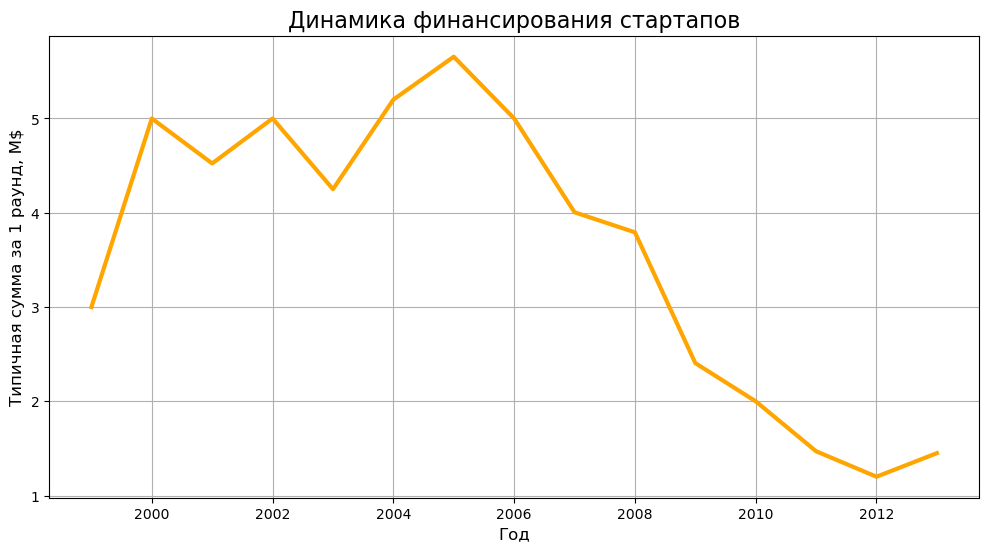

In [61]:
plt.figure()
df_year_rounds50_amounts_plt=df_year_rounds50_amounts.copy()
df_year_rounds50_amounts_plt['Типичная сумма за 1 раунд']=df_year_rounds50_amounts_plt['Типичная сумма за 1 раунд'].apply(lambda x: x/1000000)

df_year_rounds50_amounts_plt.plot(
    kind='line',
    x='Год',
    y=['Типичная сумма за 1 раунд'],
    linewidth=3, 
    legend=False,
    color='orange',
    figsize=(12, 6)
)
plt.title('Динамика финансирования стартапов', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Типичная сумма за 1 раунд, M$', fontsize=12)
plt.grid()
plt.show()

- Типичный размер выделенных в рамках одного раунда средств был максимален в 2005 году, 5.66 M$

- В 2013 году наблюдается небольшая тенденция к росту выделяемых сумм за раунд и числа раундов фининсирования, так в 2012 типичная сумма составляла 1.20M, а в 2013 уже 1.45M за раунд. Рост числа раундов в целом очевиден на протяжении всего исследуемого периода с 1999 по 2013 годы c 55 до 9207 раундов.



### 2.2. Люди и их образование


In [62]:
# Пререименуем столбец id в person_id чтобы идентификатор показывал принадлежность именно сотруднику и для удобства дальнейшего объединения
df_people=df_people.rename(columns={'id':'person_id'})


In [63]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person_id         226709 non-null  int64 
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


Выведем значения числа сотрудников компаний

In [64]:
df_people['company_id'].value_counts()

company_id
59        244
29        150
1242      138
231067     72
499        63
         ... 
82443       1
201330      1
11373       1
11372       1
143419      1
Name: count, Length: 22922, dtype: Int64

Количество сотрудников в компаниях варьируется от 1 до 244.

Чтобы объективно увидеть как меняется информация об образовании в зависимости от размера компании поделим компании на 4 примерно равные группы

Для того чтобы категоризировать компании по числу сотрудников и получить объективную сравнительную оценку нужно чтобы общее число сотрудников в каждой категории было примерно равным

In [65]:
x = df_people.groupby('company_id')['person_id'].count().sort_values(ascending=False)
persons_conmanies = x.value_counts().reset_index()
persons_conmanies.columns=['Число сотрудников', 'Число компаний']
persons_conmanies.head(10)

,Число сотрудников,Число компаний
0,1,18117
1,2,2709
2,3,921
3,4,450
4,5,237
5,6,138
6,7,100
7,8,59
8,9,46
9,11,30


Так как число компаний из одного сотрудника превышает общее число сотрудников всех остальных компаний, разделить на несколько категорий с соизмеримым общим числом сотрудников невозможно и разделение производилось по возможности в равномерной прогрессии.

Создадим столбец `company_group` в дата сете `df_people`, в котором условно разделим компании в зависимости от числа сотрудников на группы: 
- 1 `micro` как правило на начальном этапе стартап инициирует 1 человек, "идейный вдохновитель"
- 2-3 - `small` если стартап получает финансирование собирается небольшая команда для начала развития проекта
- 4-9 - `middle` при успешном развитии и получении дальнейших инвестиционных средств необходимо расширение штата сотрудников для масштабирования проекта
- 10 - `big` - категория дальнейшего прогресса при успешном ведении бизнеса

In [66]:
# Создадим функцию, которая будет возвращать категорию в зависимости от количества сотрудников:
def categorize_company_size(employees):
    if 0 < employees <= 1:
        return 'Micro_Company'
    elif 1 < employees <= 3:
        return 'Small_Company'
    elif 3 < employees <= 9:
        return 'Middle_Company'
    elif employees > 9:
        return 'Big_Company'

In [67]:
# Применим функцию к сгруппированному по компаниям числу сотрудников, сохраним в датасет
company_group = df_people.groupby('company_id')['person_id'].count().apply(categorize_company_size).reset_index()
company_group=company_group.rename(columns={'person_id': 'company_size'})

In [68]:
company_group['company_id']=company_group['company_id'].astype('Int64')

In [69]:
# Объединим датасет company_group и df_people по company_id
df_people = company_group.merge(df_people, on = 'company_id', how='right')
df_people.head()

,company_id,company_size,person_id,first_name,last_name,network_username
0,5,Big_Company,10,Mark,Zuckerberg,NaN
1,27,Big_Company,100,Peter,Lester,NaN
2,292,Small_Company,1000,Dr. Steven,E. Saunders,NaN
3,2526,Small_Company,10000,Neil,Capel,NaN
4,<NA>,NaN,100000,Sue,Pilsch,NaN


Покажем количество компаний и общее число сотрудников в них в зависимости от размера компании

In [70]:
companies=pd.DataFrame({
'Компаний': df_people.groupby('company_size')['company_id'].nunique(),
'Cотрудников': df_people.groupby('company_size')['person_id'].count().sort_values(),
})
companies.sort_values(by='Компаний')   

,Компаний,Cотрудников
company_size,,
Big_Company,145,2918
Middle_Company,1030,5399
Small_Company,3630,8181
Micro_Company,18117,18117


Чтобы соотнести информацию об образовании сотрудников с компаниями, объединим датасеты df_people и df_education

In [71]:
df_people_education = df_people.merge(df_education, on = 'person_id', how='left')

In [72]:
df_people_education.head()

,company_id,company_size,person_id,first_name,last_name,network_username,id,instituition,graduated_at
0,5,Big_Company,10,Mark,Zuckerberg,NaN,2415,Harvard University,NaT
1,27,Big_Company,100,Peter,Lester,NaN,<NA>,NaN,NaT
2,292,Small_Company,1000,Dr. Steven,E. Saunders,NaN,<NA>,NaN,NaT
3,2526,Small_Company,10000,Neil,Capel,NaN,<NA>,NaN,NaT
4,<NA>,NaN,100000,Sue,Pilsch,NaN,<NA>,NaN,NaT


In [73]:
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   company_id        44789 non-null   Int64         
 1   company_size      44789 non-null   object        
 2   person_id         267694 non-null  int64         
 3   first_name        267685 non-null  object        
 4   last_name         267690 non-null  object        
 5   network_username  50775 non-null   object        
 6   id                109056 non-null  Int64         
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), int64(1), object(5)
memory usage: 18.9+ MB


Проверим его на дубликаты, датасет должен содержать уникальные комбинации значений `person_id` и `company_id`

In [74]:
df_people_education[['person_id', 'company_id']].duplicated().sum()

40985

Обнаружены дубликаты. Удалим их.

In [75]:
df_people_education.drop_duplicates(subset = ['person_id', 'company_id'], inplace=True )

Переименуем столбец идентификатора записи об образовании `id` в `education_id` 

In [76]:
df_people_education=df_people_education.rename(columns={'id':'education_id'})

Информация об образовании сотрудников хранится в столбцах:
- `education_id` - идентификатор записи об образовании
- `instituition` - название учебного заведения
- `graduated_at` - дата получения образования

Наиболее полные данные содержатся в поле `education_id` по наличию значений в котором можно определить наличие образования

Посмотрим топ-5 университетов

In [144]:
df_people_education['instituition'].value_counts().head(10)

instituition
Stanford University                                1648
Harvard Business School                            1317
University of California, Berkeley                  946
Harvard University                                  909
Cornell University                                  616
University of Pennsylvania                          576
Massachusetts Institute of Technology (MIT)         567
Stanford University Graduate School of Business     548
University of Michigan                              513
Columbia University                                 438
Name: count, dtype: int64

Добавим столбец с бинарным значением о наличии образования `is_education`

In [78]:
df_people_education['is_education']=df_people_education['education_id'].notnull().astype('int')

In [79]:
df_people_education.head()

,company_id,company_size,person_id,first_name,last_name,network_username,education_id,instituition,graduated_at,is_education
0,5,Big_Company,10,Mark,Zuckerberg,NaN,2415,Harvard University,NaT,1
1,27,Big_Company,100,Peter,Lester,NaN,<NA>,NaN,NaT,0
2,292,Small_Company,1000,Dr. Steven,E. Saunders,NaN,<NA>,NaN,NaT,0
3,2526,Small_Company,10000,Neil,Capel,NaN,<NA>,NaN,NaT,0
4,<NA>,NaN,100000,Sue,Pilsch,NaN,<NA>,NaN,NaT,0


Посчитаем сотрудников с образованием в разрезе размера компании и выведем долю сотрудников без информации об образовании

In [80]:
df_part_no_education = df_people_education.groupby('company_size')



In [81]:
df_part_no_education = df_part_no_education.agg({'is_education':'sum','person_id':'count'}).reset_index()

In [82]:
df_part_no_education['part_no_education']=round((df_part_no_education['person_id']-df_part_no_education['is_education'])/df_part_no_education['person_id'], 3)*100
df_part_no_education=df_part_no_education.rename(columns={'company_size': 'Размер компании',
                                     'is_education':'Число сотрудников с образованием',
                                     'person_id': 'Общее число сотрудников',
                                     'part_no_education':'Процент сотрудников без информации об образовании'})
df_part_no_education.sort_values(by='Процент сотрудников без информации об образовании')

,Размер компании,Число сотрудников с образованием,Общее число сотрудников,Процент сотрудников без информации об образовании
0,Big_Company,1787,2918,38.8
1,Micro_Company,9736,18117,46.3
3,Small_Company,4311,8181,47.3
2,Middle_Company,2630,5399,51.3


- Как показывают расчеты по имеющимся данным для средних  компаний доля сотрудников с отсутвующей информацией об образовании больше 51.3 %  
- Наименьшая доля у больших компаний 38.18 %
- Микро и маленькие компании имеют промежуточные значения доли сотрудников с отсутствующей информацией об образовании, 46.3 % и 47.3 %, соответственно
- Однако данные могут быть некорректны, так как в крупных компаниях ведется более строгий учет информации о сотрудниках

- Присоединение датасета `df_degrees`

In [83]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  Int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: Int64(1), int64(1), object(2)
memory usage: 3.4+ MB


`id` - инентификатор записи об образовании в датасете `df_degrees` содержится также в датасете `df_people_education` под именем `education_id`. Переименуем его также в датасете `df_degrees`

In [84]:
df_degrees=df_degrees.rename(columns={'id':'education_id'})

`object_id` - идентификатор сотрудника в датасете `df_degrees` содержится также в датасете `df_people_education` под именем `person_id`. Переименуем его также в датасете `df_degrees`

In [85]:
df_degrees=df_degrees.rename(columns={'object_id':'person_id'})

In [86]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education_id  109610 non-null  int64 
 1   person_id     109610 non-null  Int64 
 2   degree_type   98389 non-null   object
 3   subject       81298 non-null   object
dtypes: Int64(1), int64(1), object(2)
memory usage: 3.4+ MB


Объединим датасеты по `education_id` и `person_id`

In [87]:
df_people_education_degrees=df_degrees.merge(df_people_education, on= 'person_id', how='right')

In [88]:
df_people_education_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   education_id_x    109056 non-null  float64       
 1   person_id         267694 non-null  Int64         
 2   degree_type       97883 non-null   object        
 3   subject           80890 non-null   object        
 4   company_id        44789 non-null   Int64         
 5   company_size      44789 non-null   object        
 6   first_name        267685 non-null  object        
 7   last_name         267690 non-null  object        
 8   network_username  50775 non-null   object        
 9   education_id_y    109056 non-null  Int64         
 10  instituition      109006 non-null  object        
 11  graduated_at      58783 non-null   datetime64[ns]
 12  is_education      267694 non-null  int32         
dtypes: Int64(3), datetime64[ns](1), float64(1), int32(1), objec

Датасет `df_people_education_degrees` состоит из 226709 строк и 12 столбцов и содержит информацию о сотрудниках компаний, их образовании и типе образования.

Проверим датасет `df_people_education_degrees` на дубликаты

In [89]:
df_people_education_degrees[['person_id', 'company_id']].duplicated().sum()

40985

Дубликатов нет. 

`Выводы:`
- Разделение компаний на категории проводилось из следующих соображений:- 1 `micro` как правило на начальном этапе стартап инициирует 1 человек, "идейный вдохновитель"; 2-3 - `small` если стартап получает финансирование собирается небольшая команда для начала развития проекта; 4-9 - `middle` при успешном развитии и получении дальнейших инвестиционных средств необходимо расширение штата сотрудников для масштабирования проекта; 10 - `big` - категория дальнейшего прогресса при успешном ведении бизнеса.
- Для средних  компаний доля сотрудников с отсутвующей информацией об образовании больше 51.3 %  
- Наименьшая доля у больших компаний 38.18 %
- Микро и маленькие компании имеют промежуточные значения доли сотрудников с отсутствующей информацией об образовании, 46.3 % и 47.3 %, соответственно
- Однако данные могут быть некорректны, так как в крупных компаниях ведется более строгий учет информации о сотрудниках
- Датасеты `education_id` и `person_id` успешно объединены

### 2.3. Объединять или не объединять — вот в чём вопрос


`network_username` встречается некоторых в датасетах с различным описанием
- В `df_company_and_rounds`:`network_username` — ник компании в сети.
- В `df_people`: `network username` -  ник в социальных сетях
- В `df_fund`: `network username` - ник фонда в сети.


In [90]:
df_company_and_rounds['network_username'].isna().mean()

0.5613158595608291

In [91]:
df_people['network_username'].isna().mean()

0.8285599601250943

In [92]:
df_fund['network_username'].isna().mean()

0.8155681428081016

Крайне высокая доля пропусков в столбцах 'network_username' во всех датасетах

- Проверим совпадения в `network_username` столбцах датасетов `df_company_and_rounds` и `df_people`

In [93]:
coincidence_1= df_company_and_rounds['network_username'].dropna().isin(df_people['network_username'].dropna())
coincidence_1.value_counts()

network_username
False    93040
True      2494
Name: count, dtype: int64

Совпадений очень мало и по видимому они случайны

Пропусков более половины

- Проверим совпадения в `network_username` столбцах датасетов `df_company_and_rounds` и `df_fund`

In [94]:
coincidence_2= df_company_and_rounds['network_username'].dropna().isin(df_fund['network_username'].dropna())
coincidence_2.value_counts()

network_username
False    95449
True        85
Name: count, dtype: int64

- Проверим совпадения в `network_username` столбцах датасетов `df_people` и `df_fund`

In [95]:
coincidence_3= df_people['network_username'].dropna().isin(df_fund['network_username'].dropna())
coincidence_3.value_counts()

network_username
False    38788
True        79
Name: count, dtype: int64

`Вывод`:
- Крайне высокая доля пропусков в столбцах 'network_username' во всех датасетах
- Во всех вариантах сравнения значений столбцов с одинаковым названием `network_username` в датасетах `df_company_and_rounds` `df_people` и `df_fund` совпадений крайне мало и по видимому они случайны. 
- Объединять датафреймы по `network_username` не представляется возможным.


### 2.4. Проблемный датасет и причина возникновения пропусков


По видимому датасет `df_company_and_rounds` результат объединения двух или более датасетов, 217774 строк в одном с информацией о компаниях и 52928 в другом с информацией о раундах финансирования, которые примерно в 4 раза отличаются по объему данных
- `closed_at` дата закрытия компании, пропуски означают, что компания не закрыта
- `founded at` дата инвестирования, пропусков примерно половина
- `category_code` категория области деятельности компании, пропусков примерно треть.
- `domain` официальный сайт компании. пропусков примерно треть.
- `country_code` код страны компании. пропусков примерно половина
- `network_username` ник компании в сети. Более половины пропусков

На этапе предобработки было сделано следующее:
- `company_ID` и `company_id` столбцы с уникальными идентификаторами компаний значения которых совпадали, но по отдельности столбцы имели пропуски в разных строках. Пустые значения в этих столбцах были заполнены недостающими и обьединены в один столбец `company_id`
- столбцы `is_last_round`, `is_first_round`, `participants`, `funding_rounds`, `investment_rounds`, `milestones` приведены к единому целочисленному типу
- `funded_at`, `founded_at`, `closed_at` к типу даты
- значения столбцов `company_id`, `funding_round_id` приведены к типу 'object', так как это уникальные идентификаторы
- все названия столбцов приведены к единому стилю 'snake_case'

- Чтобы избежать возможных дубликатов строчные значения в столбцах `name`, `status`, `category_code`, `funding_round_type` лучше привести к lower формату. Значения в `country_code` к UPPER
- Затем еще раз проверить на дубликаты

In [96]:
#for column in ['name', 'status', 'category_code', 'funding_round_type']:
 #   df_company_and_rounds[column]=df_company_and_rounds[column].str.lower().str.strip()
#df_company_and_rounds['country_code']=df_company_and_rounds['country_code'].str.upper().str.strip()

In [97]:
df_company_and_rounds.duplicated().sum()

0

Явных дубликатов не обнаружилось, но мы убедились, что данные в строковых столбцах были введены корректно. Поэтому вернем как было.

In [98]:
df_company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,39750000,5,888,2005-10-01,series-a,5250000,0,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,39750000,5,889,2007-01-01,series-b,9500000,0,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,39750000,5,2312,2008-05-19,series-c+,25000000,0,4,1,0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,0,0,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,0,4,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


Приведем порядок столбцов к более читаемому виду

In [99]:
# Меняем порядок столбцов
df_company_and_rounds=df_company_and_rounds[['company_id','name','status','investment_rounds','funding_rounds',
                                             'funding_total','milestones','category_code',
                                             'founded_at','closed_at','domain','network_username','country_code',
                                             'funding_round_id','funding_round_type','is_first_round','is_last_round',
                                             'participants','pre_money_valuation','raised_amount','funded_at']]

In [100]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  Int64         
 1   name                 217471 non-null  object        
 2   status               217472 non-null  object        
 3   investment_rounds    217472 non-null  Int64         
 4   funding_rounds       217472 non-null  Int64         
 5   funding_total        217472 non-null  Int64         
 6   milestones           217472 non-null  Int64         
 7   category_code        143886 non-null  object        
 8   founded_at           109956 non-null  datetime64[ns]
 9   closed_at            3449 non-null    datetime64[ns]
 10  domain               147159 non-null  object        
 11  network_username     95534 non-null   object        
 12  country_code         108607 non-null  object        
 13  funding_round_

Выведем статистические показатели значений в числовых столбцах

In [101]:
df_company_and_rounds.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at
count,217774.0,217472.0,217472.0,217472.0,217472.0,109956,3449,52928.0,52928.0,52928.0,52928.0,52928.0,52928.0,52680
mean,145172.563874,0.037711,0.612171,5996191.128564,0.650442,2005-12-29 22:12:37.481174016,2011-09-14 22:51:06.628007936,28962.894536,0.604576,0.604538,1.528567,329452.463724,7946092.255611,2010-09-30 00:41:59.179954432
min,1.0,0.0,0.0,0.0,0.0,1901-01-01 00:00:00,1963-05-12 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,1960-01-01 00:00:00
25%,51818.0,0.0,0.0,0.0,0.0,2004-01-01 00:00:00,2011-01-01 00:00:00,14343.75,0.0,0.0,0.0,0.0,246330.0,2009-04-07 00:00:00
50%,165124.0,0.0,0.0,0.0,0.0,2008-08-04 00:00:00,2012-02-02 00:00:00,28885.5,1.0,1.0,1.0,0.0,1600000.0,2011-06-01 00:00:00
75%,228135.75,0.0,0.0,0.0,1.0,2011-01-01 00:00:00,2013-01-01 00:00:00,43561.25,1.0,1.0,2.0,0.0,6700000.0,2012-10-01 00:00:00
max,286215.0,478.0,15.0,5700000000.0,9.0,2014-10-01 00:00:00,2014-01-02 00:00:00,57952.0,1.0,1.0,36.0,15000000000.0,3835050000.0,2013-12-12 00:00:00
std,92033.569543,1.962712,1.4335,48931604.284871,0.826408,NaN,NaN,16821.871803,0.488946,0.488954,2.060192,65318030.224928,42168205.893085,NaN


Общая статистика датасета df_company_and_rounds выглядит некорректно по причине большого числа нулевых значений. 

Этот датасет предназначается для анализа компаний, которые учавствуют в финансировании стартапов.
Состоит из информации о компаниях, которая перенесена в левую часть таблицы и информации о финансировании стартапов и проведенных раундах, которая перенесены в правую чать таблицы

В левой части таблицы нулевые значения в столбцах `funding_rounds`, `funding_total` соответвтвуют пропускам в правой части начиная с `funding_round_id'

Предположительно 

- 1. Заменить нулевые значения пропусками, если важно оставить информацию о всех компаниях, в том числе не учавствующих в финансировании.  В этом случае пропущенные значения не будут учитываться при анализе в отличие от нулевых и это не будет искажать статистику


- 2. Удалить все строки где пропущены значения в правой части таблицы, тогда мы потеряем 3/4 данных, но останется информация только о тех компаниях, которые принимали участие в финансировании стартапов


- 3. Создать два дополнительных датасета, в одном с информацией о всех компаниях, в другом с информацией только о тех компаниях, которые учавствовали в финансировании

Так как нашей целью является привести данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний, то выберем вариант с разделением на отдельные датасеты

Создадим датасет с информацией о всех компаниях

In [102]:
df_companies=df_company_and_rounds[['company_id', 'name', 'status', 'milestones', 'category_code',
                                    'founded_at', 'closed_at', 'domain', 'network_username', 'country_code'
                                   ]]
df_companies

,company_id,name,status,milestones,category_code,founded_at,closed_at,domain,network_username,country_code
0,1,Wetpaint,operating,5,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA
1,1,Wetpaint,operating,5,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA
2,1,Wetpaint,operating,5,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA
3,10,Flektor,acquired,0,games_video,NaT,NaT,flektor.com,NaN,USA
4,100,There,acquired,4,games_video,NaT,NaT,there.com,NaN,USA
...,...,...,...,...,...,...,...,...,...,...
217769,282847,NaN,NaN,<NA>,NaN,NaT,NaT,NaN,NaN,NaN
217770,55477,NaN,NaN,<NA>,NaN,NaT,NaT,NaN,NaN,NaN
217771,55477,NaN,NaN,<NA>,NaN,NaT,NaT,NaN,NaN,NaN
217772,283492,NaN,NaN,<NA>,NaN,NaT,NaT,NaN,NaN,NaN


Сделаем все идентификаторы компаний уникальными

In [103]:
df_companies.duplicated(subset='company_id').sum()

20989

In [104]:
df_companies = df_companies.drop_duplicates(subset='company_id')

In [105]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196785 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   company_id        196785 non-null  Int64         
 1   name              196552 non-null  object        
 2   status            196553 non-null  object        
 3   milestones        196553 non-null  Int64         
 4   category_code     123186 non-null  object        
 5   founded_at        91227 non-null   datetime64[ns]
 6   closed_at         2620 non-null    datetime64[ns]
 7   domain            126545 non-null  object        
 8   network_username  80591 non-null   object        
 9   country_code      87990 non-null   object        
dtypes: Int64(2), datetime64[ns](2), object(6)
memory usage: 16.9+ MB


Чтобы получить датасет с иформацией только о компаниях, учавствующих в финансировании стартапов нужно удалить из `df_company_and_rounds` строки с пропущенными значениями в cтолбце идентификатора раунда `funding_round_id`

In [106]:
df_rounds = df_company_and_rounds.dropna(subset = ['funding_round_id'])

In [107]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  Int64         
 1   name                 52626 non-null  object        
 2   status               52626 non-null  object        
 3   investment_rounds    52626 non-null  Int64         
 4   funding_rounds       52626 non-null  Int64         
 5   funding_total        52626 non-null  Int64         
 6   milestones           52626 non-null  Int64         
 7   category_code        51163 non-null  object        
 8   founded_at           43196 non-null  datetime64[ns]
 9   closed_at            2943 non-null   datetime64[ns]
 10  domain               50785 non-null  object        
 11  network_username     34013 non-null  object        
 12  country_code         50182 non-null  object        
 13  funding_round_id     52928 non-null

In [108]:
df_rounds.duplicated(subset='funding_round_id').sum()

0

В этом датасете все идентификаторы раундов уникальны

In [109]:
df_rounds.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at
count,52928.0,52626.0,52626.0,52626.0,52626.0,43196,2943,52928.0,52928.0,52928.0,52928.0,52928.0,52928.0,52680
mean,98490.888433,0.075666,2.529738,24778696.406928,1.130867,2006-07-04 19:46:24.591165952,2011-11-15 23:41:24.403669760,28962.894536,0.604576,0.604538,1.528567,329452.463724,7946092.255611,2010-09-30 00:41:59.179954176
min,1.0,0.0,1.0,0.0,0.0,1903-01-01 00:00:00,1997-01-01 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,1960-01-01 00:00:00
25%,26598.0,0.0,1.0,609654.25,0.0,2004-01-01 00:00:00,2011-02-01 00:00:00,14343.75,0.0,0.0,0.0,0.0,246330.0,2009-04-07 00:00:00
50%,58080.0,0.0,2.0,4521000.0,1.0,2008-01-01 00:00:00,2012-04-14 00:00:00,28885.5,1.0,1.0,1.0,0.0,1600000.0,2011-06-01 00:00:00
75%,171610.75,0.0,3.0,20536700.0,2.0,2010-08-01 00:00:00,2013-03-01 00:00:00,43561.25,1.0,1.0,2.0,0.0,6700000.0,2012-10-01 00:00:00
max,286215.0,478.0,15.0,5700000000.0,9.0,2014-01-01 00:00:00,2013-11-15 00:00:00,57952.0,1.0,1.0,36.0,15000000000.0,3835050000.0,2013-12-12 00:00:00
std,88429.084864,3.879547,1.908102,97102807.833152,1.178152,NaN,NaN,16821.871803,0.488946,0.488954,2.060192,65318030.224928,42168205.893085,NaN


Для датасета `df_rounds` общие статистичекие показатели вполне правдоподобны, за ислючением столбца `pre_money_valuation`, для которого будет необходимо провести более глубокую проверку

`Вывод:`

Таким образом мы получили 3 отдельных датасета `df_company_and_rounds`, `df_companies` и `df_rounds`, каждый из которых можно использовать под конкретную аналитическую задачу без дополнительной агрегации данных.

In [110]:
datasets_divided = pd.DataFrame({
'df_company_and_rounds': df_company_and_rounds.shape,
'df_companies': df_companies.shape,
'df_rounds': df_rounds.shape,
})
datasets_divided.index = ['Число строк', 'Число столбцов']
datasets_divided

,df_company_and_rounds,df_companies,df_rounds
Число строк,217774,196785,52928
Число столбцов,21,10,21



## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

Отфильтруем датасет `df_company_and_rounds` по заданным условиям

In [111]:
df_acquired_companies = df_company_and_rounds[(df_company_and_rounds['funding_rounds']>0)|
                    (df_company_and_rounds['investment_rounds']>0)|
                      (df_company_and_rounds['status']=='acquired')]
df_acquired_companies = df_acquired_companies.drop_duplicates(subset = ['company_id'])

Объединим отфильтрованный датасет df_acquired_companies с датасетом df_acquisition, который содержит информацию о покупках компаний

In [112]:
df_acquired = df_acquired_companies.merge(df_acquisition, left_on='company_id', right_on='acquired_company_id', how= 'left')
df_acquired = df_acquired.drop_duplicates(subset = ['company_id'])
df_acquired = df_acquired.drop('acquired_company_id', axis=1)

In [113]:
df_acquired.head()

,company_id,name,status,investment_rounds,funding_rounds,funding_total,milestones,category_code,founded_at,closed_at,...,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,operating,0,3,39750000,5,web,2005-10-17,NaT,...,1,2,0,5250000,2005-10-01,<NA>,<NA>,NaN,<NA>,NaT
1,10,Flektor,acquired,0,0,0,0,games_video,NaT,NaT,...,<NA>,<NA>,<NA>,<NA>,NaT,1,11,NaN,20000000,2007-05-30
2,100,There,acquired,0,0,0,4,games_video,NaT,NaT,...,<NA>,<NA>,<NA>,<NA>,NaT,20,377,cash,0,2005-05-29
3,1001,FriendFeed,acquired,0,1,5000000,3,web,2007-10-01,NaT,...,1,3,0,5000000,2008-02-26,1901,5,cash_and_stock,47500000,2009-08-10
4,10014,Mobclix,acquired,0,1,0,4,mobile,2008-03-01,NaT,...,1,1,0,0,2008-09-01,3878,23054,NaN,0,2010-09-30


In [114]:
df_acquired.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 40889
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40747 non-null  Int64         
 1   name                  40747 non-null  object        
 2   status                40747 non-null  object        
 3   investment_rounds     40747 non-null  Int64         
 4   funding_rounds        40747 non-null  Int64         
 5   funding_total         40747 non-null  Int64         
 6   milestones            40747 non-null  Int64         
 7   category_code         35315 non-null  object        
 8   founded_at            27807 non-null  datetime64[ns]
 9   closed_at             2128 non-null   datetime64[ns]
 10  domain                35754 non-null  object        
 11  network_username      20850 non-null  object        
 12  country_code          34742 non-null  object        
 13  funding_round_id     

Датасет df_acquired состоит из 40747 строк и 27 столбцов. Содержит информацию о компаниях, которые меняли или готовы менять владельцев

In [115]:
df_acquired_missing = pd.DataFrame({'Число пропусков': df_acquired.isna().sum() ,
                                   'Доля пропусков': df_acquired.isna().mean()}).sort_values(
    by = 'Число пропусков', ascending = False).style.background_gradient(cmap='coolwarm')
df_acquired_missing

,Число пропусков,Доля пропусков
term_code,38952,0.955948
closed_at,38619,0.947775
acquired_at,31528,0.773750
price_amount,31500,0.773063
acquiring_company_id,31500,0.773063
id,31500,0.773063
network_username,19897,0.488306
founded_at,12940,0.317569
funded_at,9261,0.227281
is_first_round,9040,0.221857


- Пропуски в поле closed_at означают, что компания еще не закрыта. Их доля 0.95.
- В столбцах с детальной информацией о раундах доля пропусков 0.22. 
- В столбце с датой основания компании 0.32 пропусков.
- В столбцах с информацией о покупках компаний доля пропусков 0.77

- На основании имеющихся данных создана таблица df_acquired из 40747 компаний, которые меняли или готовы менять владельцев. Данные датасета корректны, но неполны.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [116]:
df_acquired.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,price_amount,acquired_at
count,40747.0,40747.0,40747.0,40747.0,40747.0,27807,2128,31707.0,31707.0,31707.0,31707.0,31707.0,31707.0,31486,9247.0,9247.0,9247.0,9219
mean,110555.89614,0.150833,1.291531,10135609.636734,0.803151,2005-07-31 12:53:25.005933696,2011-09-30 23:11:16.691729408,27175.545652,0.722333,0.866086,1.44558,2882.959599,6571997.901631,2010-08-31 06:26:24.704313088,5225.031794,49288.465665,116764123.983022,2009-12-28 11:08:22.570777856
min,1.0,0.0,0.0,0.0,0.0,1901-01-01 00:00:00,1963-05-12 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,1960-01-01 00:00:00,1.0,4.0,0.0,1967-04-07 00:00:00
25%,33863.5,0.0,1.0,0.0,0.0,2003-01-01 00:00:00,2011-01-01 00:00:00,12572.5,0.0,1.0,0.0,0.0,100000.0,2009-01-01 00:00:00,2654.5,3246.0,0.0,2008-10-11 12:00:00
50%,69583.0,0.0,1.0,600000.0,1.0,2008-01-01 00:00:00,2012-02-20 00:00:00,26561.0,1.0,1.0,1.0,0.0,1000000.0,2011-04-15 00:00:00,5106.0,26077.0,0.0,2010-08-31 00:00:00
75%,184744.5,0.0,2.0,5650650.0,1.0,2011-01-01 00:00:00,2013-01-01 00:00:00,40842.5,1.0,1.0,2.0,0.0,5000000.0,2012-10-01 00:00:00,7812.0,54549.5,23838.5,2012-03-08 00:00:00
max,286215.0,478.0,15.0,5700000000.0,9.0,2014-01-01 00:00:00,2014-01-02 00:00:00,57952.0,1.0,1.0,36.0,30000000.0,2600000000.0,2013-12-12 00:00:00,10529.0,285984.0,39000000000.0,2013-12-12 00:00:00
std,90388.070107,3.123291,1.264604,56464359.977256,1.003431,NaN,NaN,16524.49782,0.447855,0.340565,2.020669,223662.686729,33551634.768751,NaN,3005.039831,68643.549203,937739159.443131,NaN


В столбце `funding_total` - сумма фининсирования, среднее значение почти на 2 порядка больше медианы. Минимальное от максимального значения отличаются на 5 порядков. Имеется большой разброс значений со сдвигом вправо.
В поле `investment_rounds` максимальное значение выглядит экстремально высоким 478 раундов.


Построим диаграмму размаха по всему диапазону значений `funding_total` не включая нулевые

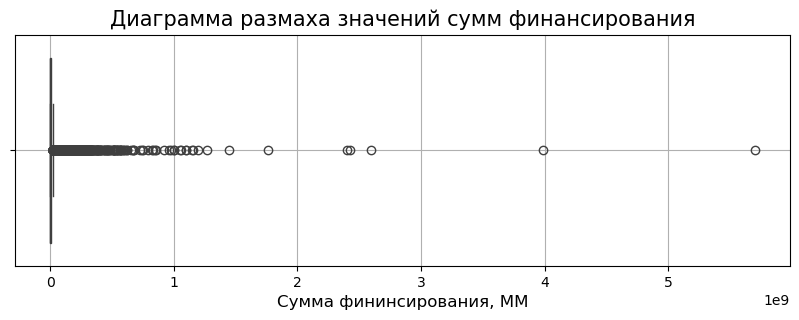

In [117]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_acquired[df_acquired['funding_total']>0], x='funding_total' )
plt.title('Диаграмма размаха значений сумм финансирования', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

Очевидны отдельные выбросы в области экстремально высоких значений. Для такого диапазона распределения и его неравномерности обычные способы нахождения типичных значений не подходят.

Посмотрим на диаграмму размаха без выбросов

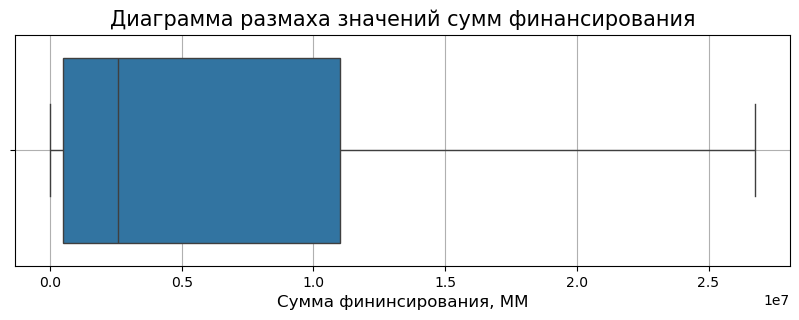

In [118]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_acquired[df_acquired['funding_total']>0], x='funding_total', showfliers = False)
plt.title('Диаграмма размаха значений сумм финансирования', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

Чтобы определить типичные значения отфильтруем выбросы по 0.75 квантилю

In [119]:
df_acquired_filt = df_acquired[(df_acquired['funding_total']< df_acquired['funding_total'].quantile(0.75))&
                               (df_acquired['funding_total'] > 0)]

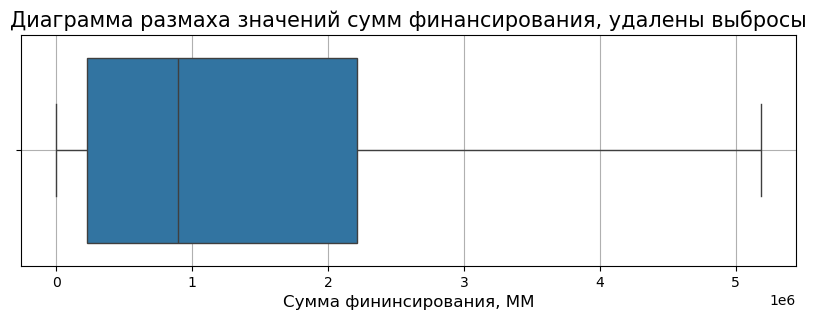

In [120]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_acquired_filt, x='funding_total', showfliers = False)
plt.title('Диаграмма размаха значений сумм финансирования, удалены выбросы', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

In [121]:
df_acquired_filt.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,price_amount,acquired_at
count,17687.0,17687.0,17687.0,17687.0,17687.0,13758,1289,17687.0,17687.0,17687.0,17687.0,17687.0,17687.0,17618,921.0,921.0,921.0,919
mean,136969.918302,0.018771,1.353706,1440703.660202,0.740714,2008-04-04 15:31:38.124727552,2011-11-26 19:24:03.910007552,30990.248318,0.81461,0.916266,1.094759,859.953638,1133599.806977,2011-02-28 12:05:57.997502464,6361.661238,44445.563518,18991806.840391,2011-03-26 15:37:01.109902336
min,7.0,0.0,1.0,291.0,0.0,1908-01-01 00:00:00,1998-11-11 00:00:00,18.0,0.0,0.0,0.0,0.0,0.0,1960-11-01 00:00:00,7.0,5.0,0.0,1998-01-01 00:00:00
25%,47452.5,0.0,1.0,230000.0,0.0,2007-01-01 00:00:00,2011-02-02 00:00:00,17705.5,1.0,1.0,0.0,0.0,150000.0,2010-01-01 00:00:00,3933.0,1705.0,0.0,2010-02-16 00:00:00
50%,149351.0,0.0,1.0,900000.0,1.0,2010-01-01 00:00:00,2012-04-15 00:00:00,32197.0,1.0,1.0,1.0,0.0,588384.0,2011-10-19 00:00:00,7004.0,13927.0,0.0,2011-08-22 00:00:00
75%,224741.0,0.0,2.0,2211000.0,1.0,2011-07-01 00:00:00,2013-03-15 00:00:00,44425.0,1.0,1.0,1.0,0.0,1595525.0,2013-01-01 00:00:00,8927.0,52783.0,0.0,2012-10-20 12:00:00
max,286215.0,89.0,15.0,5650000.0,7.0,2014-01-01 00:00:00,2013-11-15 00:00:00,57952.0,1.0,1.0,32.0,8500000.0,5650000.0,2013-12-12 00:00:00,10507.0,283975.0,4900000000.0,2013-12-10 00:00:00
std,92089.671182,0.844649,0.743368,1507659.707431,0.897082,NaN,NaN,15948.438195,0.388625,0.276996,1.889776,73291.548144,1340096.234887,NaN,3010.455027,67852.251511,177714563.892976,NaN


Построим диаграмму размаха значений `funding_total`

Вычислим значения моду для сумм финансирования

In [122]:
df_acquired_filt['funding_total'].mode()

0    1000000
Name: funding_total, dtype: Int64

Самое часто встречаемое значение суммы финансирования 1МM

In [123]:
df_acquired_filt.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,price_amount,acquired_at
count,17687.0,17687.0,17687.0,17687.0,17687.0,13758,1289,17687.0,17687.0,17687.0,17687.0,17687.0,17687.0,17618,921.0,921.0,921.0,919
mean,136969.918302,0.018771,1.353706,1440703.660202,0.740714,2008-04-04 15:31:38.124727552,2011-11-26 19:24:03.910007552,30990.248318,0.81461,0.916266,1.094759,859.953638,1133599.806977,2011-02-28 12:05:57.997502464,6361.661238,44445.563518,18991806.840391,2011-03-26 15:37:01.109902336
min,7.0,0.0,1.0,291.0,0.0,1908-01-01 00:00:00,1998-11-11 00:00:00,18.0,0.0,0.0,0.0,0.0,0.0,1960-11-01 00:00:00,7.0,5.0,0.0,1998-01-01 00:00:00
25%,47452.5,0.0,1.0,230000.0,0.0,2007-01-01 00:00:00,2011-02-02 00:00:00,17705.5,1.0,1.0,0.0,0.0,150000.0,2010-01-01 00:00:00,3933.0,1705.0,0.0,2010-02-16 00:00:00
50%,149351.0,0.0,1.0,900000.0,1.0,2010-01-01 00:00:00,2012-04-15 00:00:00,32197.0,1.0,1.0,1.0,0.0,588384.0,2011-10-19 00:00:00,7004.0,13927.0,0.0,2011-08-22 00:00:00
75%,224741.0,0.0,2.0,2211000.0,1.0,2011-07-01 00:00:00,2013-03-15 00:00:00,44425.0,1.0,1.0,1.0,0.0,1595525.0,2013-01-01 00:00:00,8927.0,52783.0,0.0,2012-10-20 12:00:00
max,286215.0,89.0,15.0,5650000.0,7.0,2014-01-01 00:00:00,2013-11-15 00:00:00,57952.0,1.0,1.0,32.0,8500000.0,5650000.0,2013-12-12 00:00:00,10507.0,283975.0,4900000000.0,2013-12-10 00:00:00
std,92089.671182,0.844649,0.743368,1507659.707431,0.897082,NaN,NaN,15948.438195,0.388625,0.276996,1.889776,73291.548144,1340096.234887,NaN,3010.455027,67852.251511,177714563.892976,NaN


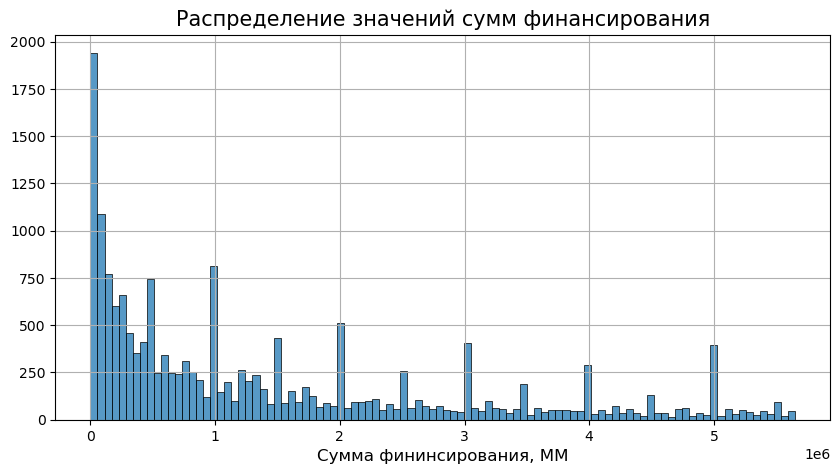

In [124]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_acquired_filt, x='funding_total', bins = 100
)
plt.title('Распределение значений сумм финансирования', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

Гистограииа распределения показывает, что в этом наборе данных нет явно выраженной пиковой точки. Поэтому типичные значкния будем оценивать графически.

Отобразим распределение для значений менее 1ММ

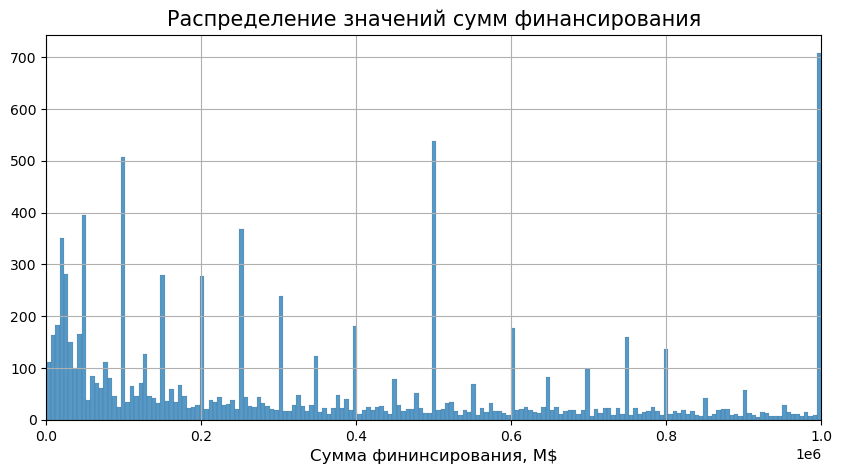

In [125]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_acquired_filt, x='funding_total', bins = 1000
)
plt.title('Распределение значений сумм финансирования', fontsize = 15)
plt.xlabel('Сумма фининсирования, M$', fontsize = 12)
plt.xlim(0,1000000)
plt.ylabel('')
plt.grid()
plt.show()

Как видно из диаграмм распределения для типичных характерны "круглые" суммы. 
- Самым типичным значением общего финансирования для одной компании является значение моды 1 MM.
- Следующими по количеству значений идут 0.5, 2, 3 и 5 MM.

Диаграммы размаха показывают, что
- Выбивающимися суммами являются отдельные выбросы в области экстремально высоких значений с максимальным в 5.7 миллиардов


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [126]:
df_acquired_zero = df_acquired[(df_acquired['funding_total']>0)&
                               (df_acquired['price_amount']<2)&
                                (df_acquired['price_amount'].notna())&
                                 (df_acquired['funding_total'].notna())]
df_acquired_zero.head()

,company_id,name,status,investment_rounds,funding_rounds,funding_total,milestones,category_code,founded_at,closed_at,...,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,term_code,price_amount,acquired_at
25,10054,Jumptap,acquired,0,7,121500000,3,mobile,2005-01-01,NaT,...,0,6,0,26000000,2008-08-26,9288,23283,cash_and_stock,0,2013-08-13
63,101312,SideTour,acquired,0,3,4000000,2,web,2011-06-01,NaT,...,0,3,0,1500000,2011-10-17,9653,11391,NaN,0,2013-09-18
66,101340,ChoicePass,acquired,0,1,250000,1,enterprise,2011-07-01,NaT,...,1,0,0,250000,2011-07-01,7272,1972,NaN,0,2012-06-18
67,10137,Producteev,acquired,0,3,1310000,2,software,2008-07-08,NaT,...,1,9,0,180000,2008-07-15,8254,757,cash_and_stock,0,2012-11-05
68,10139,TradeCard,acquired,0,2,44925000,1,enterprise,1999-01-01,NaT,...,1,1,0,14000000,2006-04-19,9326,44008,NaN,0,2013-04-01


In [127]:
df_acquired_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1584 entries, 25 to 40872
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1584 non-null   Int64         
 1   name                  1584 non-null   object        
 2   status                1584 non-null   object        
 3   investment_rounds     1584 non-null   Int64         
 4   funding_rounds        1584 non-null   Int64         
 5   funding_total         1584 non-null   Int64         
 6   milestones            1584 non-null   Int64         
 7   category_code         1519 non-null   object        
 8   founded_at            1257 non-null   datetime64[ns]
 9   closed_at             13 non-null     datetime64[ns]
 10  domain                1512 non-null   object        
 11  network_username      788 non-null    object        
 12  country_code          1503 non-null   object        
 13  funding_round_id     

In [128]:
df_acquired_zero['price_amount'].value_counts()

price_amount
0    1584
Name: count, dtype: Int64

В предоставленных данных имеется 1584 компании, которые были куплены за ноль, при этом имели ненулевой общий объем финансирования

In [129]:
df_acquired_zero.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,price_amount,acquired_at
count,1584.0,1584.0,1584.0,1584.0,1584.0,1257,13,1584.0,1584.0,1584.0,1584.0,1584.0,1584.0,1577,1584.0,1584.0,1584.0,1580
mean,39811.472854,0.005682,1.890152,17859642.585227,1.445707,2004-05-21 15:40:31.503579904,2010-05-12 16:36:55.384615424,13857.5,0.630051,0.785985,2.472854,12500.0,8406164.207702,2008-05-26 14:14:41.166772480,6267.963384,44961.233586,0.0,2011-03-02 06:52:51.645569536
min,9.0,0.0,1.0,3750.0,0.0,1968-01-01 00:00:00,2001-02-01 00:00:00,5.0,0.0,0.0,0.0,0.0,0.0,1996-01-01 00:00:00,14.0,5.0,0.0,1998-01-01 00:00:00
25%,10847.25,0.0,1.0,2000000.0,0.0,2001-01-01 00:00:00,2009-01-09 00:00:00,4756.25,0.0,1.0,1.0,0.0,1000000.0,2006-12-01 00:00:00,3882.5,2680.0,0.0,2010-01-14 00:00:00
50%,28027.0,0.0,1.0,6000000.0,1.0,2005-06-01 00:00:00,2011-12-01 00:00:00,12045.0,1.0,1.0,2.0,0.0,3740000.0,2008-04-23 00:00:00,6744.5,18081.0,0.0,2011-06-15 12:00:00
75%,49873.0,0.0,2.0,15400000.0,2.0,2008-01-18 00:00:00,2012-09-18 00:00:00,18966.5,1.0,1.0,3.0,0.0,9000000.0,2010-02-09 00:00:00,8831.75,50941.0,0.0,2012-09-20 12:00:00
max,268806.0,2.0,12.0,5700000000.0,6.0,2012-10-01 00:00:00,2013-09-17 00:00:00,57881.0,1.0,1.0,26.0,8500000.0,920000000.0,2013-09-26 00:00:00,10513.0,284510.0,0.0,2013-12-10 00:00:00
std,44773.398852,0.090443,1.242256,145666041.635378,1.218755,NaN,NaN,11732.694154,0.482943,0.410267,2.400362,271693.060996,28965755.438485,NaN,2991.573559,67209.154371,0.0,NaN


Разброс значений финансирования для таких компаний примерно от 3.75 тысяч до 5.7 миллиарда.

Построим диаграмму размаха

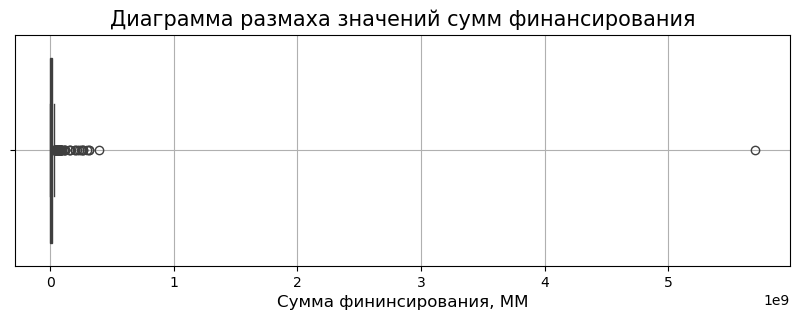

In [130]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_acquired_zero, x='funding_total')
plt.title('Диаграмма размаха значений сумм финансирования', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

Помимо выбросов видно одно экстремально высокое значение за пределами их основного диапазона. Посмотрим

In [131]:
df_acquired_zero[df_acquired_zero['funding_total']==df_acquired_zero['funding_total'].max()]

,company_id,name,status,investment_rounds,funding_rounds,funding_total,milestones,category_code,founded_at,closed_at,...,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,term_code,price_amount,acquired_at
1346,13219,Clearwire,acquired,0,4,5700000000,2,mobile,2003-10-01,NaT,...,0,5,0,920000000,2009-11-24,8023,3827,NaN,0,2012-12-17


Компания Clearwire категории mobile, основанная в 2003-10-01, была куплена за 0 в 2012-12-17. Общая сумма финансирования за 4 раунда к составила 5.7 миллиардов.

*Спрака: Clearwire Телекоммуникационный оператор, предоставлявший услуги мобильной и фиксированной беспроводной широкополосной связи розничным и оптовым клиентам в Соединенных Штатах, Бельгии, Ирландии и Испании. Clearwire уходит корнями в 1998 год, когда Sierra Technologies, Inc. выделила определенные активы для формирования новой компании Clearwire Technologies Inc. В октябре 2003 года Крейг Маккоу приобрел Clearwire Technologies, Inc. материнскую компанию Clearwire Holdings и перенес штаб-квартиру компании в Киркленд, штат Вашингтон. В 2012 году Clearwire перенесла штаб-квартиру компании в Бельвью, штат Вашингтон*.

Диаграмма размаха без выбросов

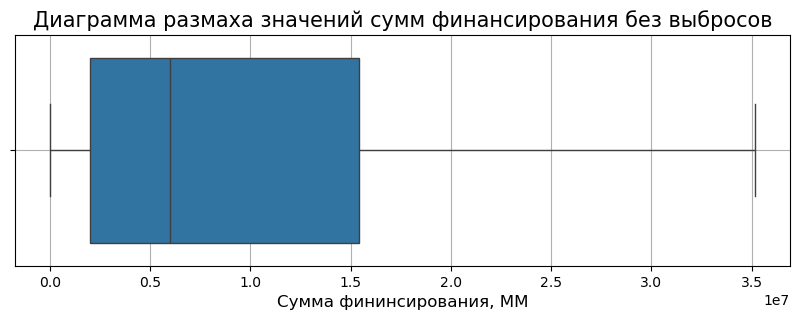

In [132]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_acquired_zero, x='funding_total', showfliers = False)
plt.title('Диаграмма размаха значений сумм финансирования без выбросов', fontsize = 15)
plt.xlabel('Сумма фининсирования, MM', fontsize = 12)
plt.ylabel('')
plt.grid()
plt.show()

Посчитаем верхнюю и нижнюю границы выбросов методом IQR

In [133]:
Q1 = np.percentile(df_acquired_zero['funding_total'], 25) 
Q3 = np.percentile(df_acquired_zero['funding_total'], 75) 
IQR = Q3 - Q1                 
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  
print('IQR:', IQR)
print('Нижняя граница выбросов:', lower_bound)
print('Верхняя граница выбросов:', upper_bound)

IQR: 13400000.0
Нижняя граница выбросов: -18100000.0
Верхняя граница выбросов: 35500000.0


Отрицательное значение нижней границы обусловлена сильной асимметрией данных или наличием высоких выбросов, которые увеличивают IQR.
Таким образом если нижняя граница отрицательная, то нижних выбросов нет.

Посчитаем процентиль верхней границы выбросов

In [134]:
from scipy import stats

percentile = stats.percentileofscore(df_acquired_zero['funding_total'], upper_bound, kind="rank")
print('Процентиль верхней границы выбросов:', round(percentile, 2))

Процентиль верхней границы выбросов: 91.16


- 1584 компании, которые были проданы за ноль или за 1 доллар, при этом имели ненулевой общий объем финансирования
- Разброс значений финансирования для таких компаний примерно от 3.75 тысяч до 5.7 миллиарда
- Аналитический расчет показал что нижних выбросов нет, а граница верхних находится на значении 35.5 ММ
- Процентиль верхней границы выбросов: 91.16


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Отфильтруем датасет df_acquired, оставив только те компании, которые имеют информацию о продаже

In [135]:
df_sold = df_acquired.dropna(subset = ['price_amount'])
print('Проданных компаний:', df_sold.shape[0])

Проданных компаний: 9247


In [136]:
df_sold.describe()

,company_id,investment_rounds,funding_rounds,funding_total,milestones,founded_at,closed_at,funding_round_id,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount,funded_at,id,acquiring_company_id,price_amount,acquired_at
count,9247.0,9247.0,9247.0,9247.0,9247.0,4701,35,2561.0,2561.0,2561.0,2561.0,2561.0,2561.0,2545,9247.0,9247.0,9247.0,9219
mean,72110.543419,0.020763,0.525684,5503039.176922,0.761436,2000-10-08 14:52:54.984045824,2009-02-09 13:01:42.857142784,14068.213588,0.648575,0.775478,2.478329,11245.607185,9449657.001952,2008-03-16 13:22:19.567780096,5225.031794,49288.465665,116764123.983022,2009-12-28 11:08:22.570777600
min,4.0,0.0,0.0,0.0,0.0,1903-01-01 00:00:00,1963-05-12 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,1960-01-01 00:00:00,1.0,4.0,0.0,1967-04-07 00:00:00
25%,23572.5,0.0,0.0,0.0,0.0,1998-01-01 00:00:00,2009-09-07 12:00:00,4564.0,0.0,1.0,1.0,0.0,750000.0,2006-10-01 00:00:00,2654.5,3246.0,0.0,2008-10-11 12:00:00
50%,45534.0,0.0,0.0,0.0,0.0,2003-01-01 00:00:00,2011-08-01 00:00:00,11940.0,1.0,1.0,2.0,0.0,4000000.0,2008-02-28 00:00:00,5106.0,26077.0,0.0,2010-08-31 00:00:00
75%,81506.0,0.0,1.0,0.0,1.0,2007-05-01 00:00:00,2013-01-19 00:00:00,18938.0,1.0,1.0,3.0,0.0,10000000.0,2010-01-20 00:00:00,7812.0,54549.5,23838.5,2012-03-08 00:00:00
max,286176.0,10.0,12.0,5700000000.0,8.0,2013-08-01 00:00:00,2014-01-02 00:00:00,57881.0,1.0,1.0,36.0,9000000.0,920000000.0,2013-11-25 00:00:00,10529.0,285984.0,39000000000.0,2013-12-12 00:00:00
std,73192.837653,0.259789,1.083355,63287451.98389,1.056675,NaN,NaN,12454.916177,0.477509,0.417348,2.487237,277950.174346,27509895.905424,NaN,3005.039831,68643.549203,937739159.443114,NaN


Для измерения разброса или вариации данных используется стандартное отклонение. Чем больше стандартное отклонение, тем сильнее данные "разбросаны" вокруг среднего значения.


**Нужно понять учитавать или не учитывать нулевые значения стоимости компаний?**

Когда в данных о продаже компаний указана нулевая цена, это может означать несколько возможных сценариев. Вот основные причины, почему цена сделки может быть равна нулю:

1. Сделка не предполагала денежного вознаграждения
Бартерный обмен: Компания могла быть продана в обмен на другие активы, услуги или долю в другой компании, без прямого денежного перевода.

Обмен акциями: Если сделка предполагала обмен акциями между компаниями, денежная цена может быть указана как нулевая, так как расчёты происходили в ценных бумагах.

2. Сделка была номинальной
Юридическая формальность: Иногда сделки оформляются с нулевой ценой для упрощения юридических процедур, особенно если продажа происходит между связанными сторонами (например, внутри одной холдинговой структуры).

Передача активов внутри группы компаний: Если компания передаётся от одного подразделения к другому в рамках одной группы, цена может быть указана как нулевая.

3. Сделка была убыточной или долговой
Продажа с долгами: Если у компании были значительные долги, её могли продать за символическую сумму (например, 1 доллар) или за нулевую цену, чтобы избавиться от обязательств.

Банкротство: В случае банкротства компания может быть продана за нулевую цену, если её обязательства превышают стоимость активов.

4. Ошибка в данных
Техническая ошибка: Нулевая цена может быть результатом ошибки ввода данных или отсутствия информации о реальной стоимости сделки.

Неполные данные: Если данные о сделке не были полностью раскрыты, цена может быть указана как нулевая.

5. Сделка с особыми условиями
Условная продажа: Иногда сделка предполагает выполнение определённых условий в будущем (например, достижение финансовых показателей), и цена может быть указана как нулевая до выполнения этих условий.

Благотворительность: Компания могла быть передана на безвозмездной основе, например, в рамках благотворительной инициативы.

6. Сделка с государственным участием
Национализация или приватизация: В некоторых случаях государство может передать компанию частному лицу или другой организации за нулевую цену в рамках политических или экономических реформ.

**В качестве критерия будем считать, что компании с 0 или 1 стоимостью считаются купленными по номинальным сделкам и будем опираться на данные неноминальных компаний со стоимостью (>1)**

Выведем статистические показатели проданных компаний отсортированные по их числу 
- для компаний, купленных по неноминальным сделкам (>1)
- для всех компаний


In [137]:
prices_mean_group = pd.DataFrame({
                                  'Число компаний':df_sold.groupby('category_code')['company_id'].count(),
                                  'СРЕДНЯЯ ЦЕНА (>1), ММ':df_sold[df_sold['price_amount']>1].groupby('category_code')['price_amount'].mean()/1000000,
                                  'МЕДИАНА (>1), ММ': df_sold[df_sold['price_amount']>1].groupby('category_code')['price_amount'].median()/1000000,
                                  'РАЗБРОС ЦЕН (>1), ММ': (df_sold[df_sold['price_amount']>1].groupby('category_code')['price_amount'].max()-
                                   df_sold[df_sold['price_amount']>1].groupby('category_code')['price_amount'].min())/1000000,
                                   'СТАНДАРТНОЕ ОТКЛОНЕНИЕ (>1), ММ': df_sold[df_sold['price_amount']>1].groupby('category_code')['price_amount'].std()/1000000,
    
                                  'Средняя цена, ММ':df_sold.groupby('category_code')['price_amount'].mean()/1000000,
                                  'Медиана, ММ': df_sold.groupby('category_code')['price_amount'].median()/1000000,
                                  'Разброс цен, ММ': (df_sold.groupby('category_code')['price_amount'].max()-
                                   df_sold.groupby('category_code')['price_amount'].min())/1000000,
                                   'Стандартное отколение, ММ': df_sold.groupby('category_code')['price_amount'].std()/1000000                                 
                                 })
prices_mean_group.sort_values(by = ['Число компаний'], ascending = False)

,Число компаний,"СРЕДНЯЯ ЦЕНА (>1), ММ","МЕДИАНА (>1), ММ","РАЗБРОС ЦЕН (>1), ММ","СТАНДАРТНОЕ ОТКЛОНЕНИЕ (>1), ММ","Средняя цена, ММ","Медиана, ММ","Разброс цен, ММ","Стандартное отколение, ММ"
category_code,,,,,,,,,
software,1444,378.543494,48.07,10199.998142,1193.245393,104.335395,0.0,10200.0,648.349149
web,956,249.893083,50.0,6399.995,644.773199,66.132793,0.0,6400.0,349.093744
biotech,452,736.243176,200.0,19999.891,1971.95495,426.760425,13.2,20000.0,1543.618683
mobile,412,352.918735,56.0,12499.995,1319.471637,100.222068,0.0,12500.0,718.864421
enterprise,404,559.40446,56.5,13899.98,1614.921635,156.467089,0.0,13900.0,887.693099
games_video,333,459.847424,51.5,9999.99994,1487.437889,117.378472,0.0,10000.0,774.662185
other,308,550.273194,71.55,18399.9975,2109.935747,142.928102,0.0,18400.0,1097.26721
advertising,307,245.749878,58.5,3099.99,491.459531,65.640033,0.0,3100.0,275.310947
ecommerce,265,246.241021,180.0,1249.999989,282.331182,45.531359,0.0,1250.0,153.837868


Отфильтруем категории где число компаний меньше 5, так как для них нет статистичеких показателей разброса

In [138]:
prices_mean_group = prices_mean_group[prices_mean_group['Число компаний']>5]

- Выведем топ 15 категорий компаний с типично высокими ценами и наибольшим разбросом цен

Для компаний с типично высокими ценами, показатели медианы и стандартного отклонения должны быть максимальными

In [139]:
prices_median_group = prices_mean_group.sort_values(by = ['МЕДИАНА (>1), ММ', 'СТАНДАРТНОЕ ОТКЛОНЕНИЕ (>1), ММ'],
                              ascending = [False, False]).head(15).reset_index()
prices_median_group.index = prices_median_group.index + 1
prices_median_group.style.background_gradient(
                              cmap='Blues').set_caption(
                              'ТОП 15 категорий компаний с типично высокими ценами и наибольшим разбросом цен')

,category_code,Число компаний,"СРЕДНЯЯ ЦЕНА (>1), ММ","МЕДИАНА (>1), ММ","РАЗБРОС ЦЕН (>1), ММ","СТАНДАРТНОЕ ОТКЛОНЕНИЕ (>1), ММ","Средняя цена, ММ","Медиана, ММ","Разброс цен, ММ","Стандартное отколение, ММ"
1,real_estate,7,1465.500000,400.000000,6847.000000,2676.302206,1256.142857,50.000000,6850.000000,2505.122913
2,manufacturing,29,813.757161,351.000000,4049.999627,1060.434506,589.272427,72.000000,4050.000000,969.657968
3,transportation,7,450.000000,230.000000,1080.000000,572.625532,192.857143,0.000000,1100.000000,408.848557
4,biotech,452,736.243176,200.000000,19999.891000,1971.954950,426.760425,13.200000,20000.000000,1543.618683
5,analytics,39,181.000000,200.000000,183.000000,92.967736,13.923077,0.000000,263.000000,53.313563
6,fashion,11,187.500000,195.000000,172.500000,86.494219,51.136364,0.000000,270.000000,95.742909
7,ecommerce,265,246.241021,180.000000,1249.999989,282.331182,45.531359,0.000000,1250.000000,153.837868
8,cleantech,115,488.166579,177.500000,3749.550000,885.383456,161.307217,0.000000,3750.000000,554.627993
9,finance,40,604.397500,171.500000,4398.800000,1052.920129,302.198750,0.600000,4400.000000,796.098476
10,security,127,617.778571,169.000000,7678.150000,1395.628675,170.253937,0.000000,7680.000000,776.137103


- Топ 15 был выведен так как стандартное отклонение с медианой не коррелирует, а оценивать нужно по этим двум показателям, которые находятся на разных местах рейтинга 
- `real_estate`,  `manufacturing` и  `transportation` отрасли, в которых типичная стоимость компаний наиболее высокая и существенный разброс значений стоимости.
- Отдельно нужно выделить отрасль `biotech`, она на 4 месте по типичной цене за компанию, однако имеет разброс значений на порядок выше чем у тройки лидеров, при этом отличается наибольшем числом компаний, представленных в топе
- Отрасль `public_relations` имеет самый высокий разрос значений, при этом типичная стоимость компании еще достаточно высока
- Также по таблице можно понять по столбцу 'Медиана, ММ' в каких категориях больше номинальных сделок с 0 или 1 стоимистью



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Выведем значения столбца `status`

In [140]:
df_acquired['status'].value_counts()

status
operating    28621
acquired      9394
closed        2092
ipo            640
Name: count, dtype: int64

Имеется 4 категории `acquired` - проданный, `closed` - закрытый, `operating` - действующий, `ipo` - первое публичное предложение

Выведем значения столбца `funding_rounds`

In [141]:
df_acquired['funding_rounds'].value_counts()

funding_rounds
1     20534
0      9040
2      6142
3      2662
4      1216
5       600
6       249
7       147
8        67
9        46
10       23
11       10
13        5
12        3
15        2
14        1
Name: count, dtype: Int64

Наиболее часто встречаемое значение числа раундов финансирования 1

Почитаем среднее значение числа раундов для каждой категории - статуса.

In [142]:
staus_group = df_acquired.groupby('status')['funding_rounds'].agg('mean').sort_values()
staus_group

status
acquired     0.523526
closed       1.381453
operating    1.522658
ipo          1.934375
Name: funding_rounds, dtype: Float64

Построим диаграмму -  среднее число раундов финансирования по статусам компаний

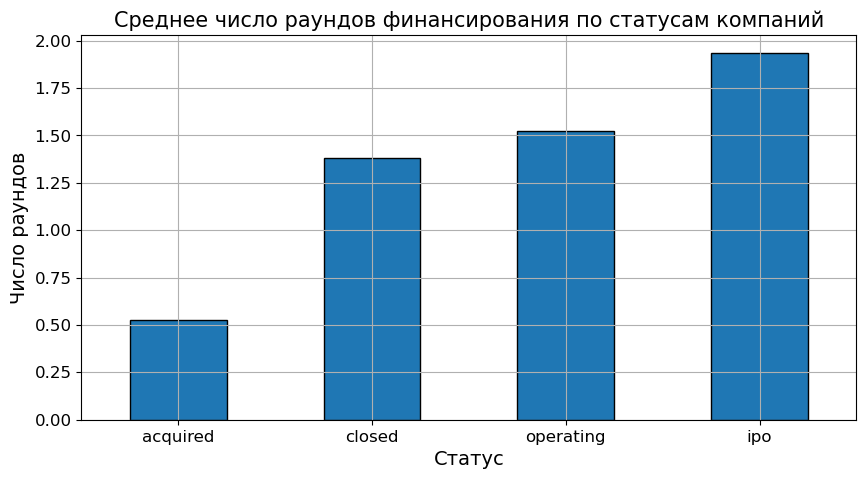

In [143]:
staus_group.plot(kind='bar',
               rot=0,
               figsize=(10, 5),
               edgecolor='black'
                )
plt.title('Среднее число раундов финансирования по статусам компаний', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12) 
plt.xlabel('Статус', fontsize=14)
plt.ylabel('Число раундов', fontsize=14)
plt.grid(1)
plt.show()

Статусы компаний
- acquired - проданный 0.523526
- closed - закрытый 1.381453
- operating - действующий 1.522658
- ipo - первое публичное предложение 1.934375 

- У компаний со статусом acquired самый низкий показатель числа раундов финансирования, они быстро продаются или не получая финансирования или всего один раунд. Вложение в такие компании по видимому несет определенные риски.
- Компании со статусом closed прошли в среднем 1.381453 раунда, прежде чем закрыться. 
- Для действующих компаний среденее значение 1.522658 больше чем у закрытых, что может указывать на их перспективность.
- Наиболее профинансированные компании, в среднем около 2 раундов, получают статус IPO, то есть когда она переходит из статуса частной в публичную, продавая свои акции широкому кругу инвесторов. Это переходный этап в жизни успешной компании, который позволяет привлечь капитал для развития бизнеса.





## Шаг 4. Итоговый вывод и рекомендации

***Загрузка и первичная предобработка***
- Данные были представлены 5 таблицами, котроые после первичной обработки были преобразованы в 5 датасетов `df_acquisition`, `df_company_and_rounds`, `df_people, df_education`, `df_degrees`, в которых были скорректированы типы данных, названия столбцов приведены к общему формату. Все датасеты имеют столбцы с уникальными идентификаторами, по которым их можно объединять. Исходные данные для датасетов неполны, однако их достаточно для решения задач проекта

***Раунды финансирования по годам***
- Постоен линейный график зависимости типичной суммы выделенных средств финансирования стартапов за один раунд от года, на котором отображена информация для тех лет когда число раундов превышало 50 . Типичный размер выделенных в рамках одного раунда средств был максимален в 2005 году, 5.66 MМ. В 2013 году наблюдалась небольшая тенденция к росту выделяемых сумм за раунд и числа раундов фининсирования, так в 2012 типичная сумма составляла 1.20MМ, а в 2013 уже 1.45MМ за раунд. Рост числа раундов в целом очевиден на протяжении всего исследуемого периода с 1999 по 2013 годы c 55 до 9207 раундов.

***Люди и их образование***
- Датасеты `education_id` и `person_id` успешно объединены
- Все компании были поделены на 4 категории в зависимости от размера, т. е. числа сотрудников в них. Для средних  компаний доля сотрудников с отсутвующей информацией об образовании больше 51.3 %. Наименьшая доля у больших компаний 38.18 %. Микро и маленькие компании имеют промежуточные значения доли сотрудников с отсутствующей информацией об образовании, 46.3 % и 47.3 %, соответственно. 
- Данные могут быть некорректны, так как отсутствие информации об образовании не говорит об осутствии образования. К тому же в крупных компаниях ведется более строгий учет информации о сотрудниках, поэтому процент сотрудников с отсутствующей информацие может быть ниже.


***Объединять или не объединять по `network_username`***
- Поле `network_username` встречается некоторых в датасетах и было установлено, что объединять датафреймы по этому полю не представляется возможным по причине большого числа пропусков и несовпадения значений в этих столбцах

***Проблемный датасет `company_and_rounds.csv`***
- Датасет с большим числом пропусков `df_company_and_rounds` был разделен на 2 датасета `df_companies` и `df_rounds` что позвояет более качественно проводить анализ в разрезе отдельных компаний и раундов фининсирования

***Объединение данных***
 - На основании имеющихся данных создана таблица df_acquired из 40747 компаний, которые меняли или готовы менять владельцев. Данные датасета корректны, но неполны.

***Обычный размер и разрос значений средств, который предоставлялся компаниям***
 - из диаграмм распределения установлено, что для типичного размера средств, предоставляемых компаниям, характерны "круглые" суммы. Самым типичным значением общего финансирования для одной компании является значение 1 MM. Следующими по количеству значений идут 0.5, 2, 3 и 5 MM.
- Диаграммы размаха показывали, что выбивающимися суммами являются отдельные выбросы в области экстремально высоких значений с максимальным в 5.7 миллиардов

***Компании купленнные забесплатно***
- В данных имеется 1584 компании, которые были проданы за ноль или за 1 доллар, при этом имели ненулевой общий объем финансирования
- нулевая цена 0 или 1 может быть связана с бартером, юридическими формальностями, долгами, ошибками, особыми условиями или госучастием. Такие сделки решено считать номинальными и в исследованиях, когда это необходимо, опираться на данные неноминальных компаний со стоимостью (>1)
- Разброс значений финансирования для таких компаний примерно от 3.75 тысяч до 5.7 миллиарда. Аналитический расчет показал что нижних выбросов нет, а граница верхних находится на значении 35.5 ММ. Процентиль верхней границы выбросов: 91.16

***Цены стартапов по категориям***
- Выведен топ 15 категорий компаний с типично высокими ценами и наибольшим разбросом цен, которые могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов.
- `real_estate`,  `manufacturing` и  `transportation` отрасли, в которых типичная стоимость компаний наиболее высокая и существенный разброс значений стоимости.
- Отдельно нужно выделить отрасль `biotech`, она на 4 месте по типичной цене за компанию, однако имеет разброс значений на порядок выше чем у тройки лидеров, при этом отличается наибольшем числом компаний, представленных в топе
- Отрасль `public_relations` имеет самый высокий разрос значений, при этом типичная стоимость компании еще достаточно высока
- Также по таблице можно понять в каких категориях больше номинальных сделок с 0 или 1 стоимистью

***Сколько раундов продержится стартап перед покупкой***
- Построена диаграмма среднего число раундов финансирования по статусам компаний
- У компаний со статусом acquired самый низкий показатель числа раундов финансирования, они быстро продаются или не получая финансирования или всего один раунд. Вложение в такие компании по видимому несет определенные риски.
- Компании со статусом closed прошли в среднем 1.381453 раунда, прежде чем закрыться. 
- Для действующих компаний среденее значение 1.522658 больше чем у закрытых, что может указывать на их перспективность.
- Наиболее профинансированные компании, в среднем около 2 раундов, получают статус IPO, то есть когда она переходит из статуса частной в публичную, продавая свои акции широкому кругу инвесторов. Это переходный этап в жизни успешной компании, который позволяет привлечь капитал для развития бизнеса.

В целом предоставленных данных, хотя они разрознены и неполны, после проделанной предобработки, оказалось вполне достаточно чтобы ответить на посталенные вопросы.
      
**Рекомендации**
- Для построения успешной модели бизнеса по покупке стартапов нужно учитывать динамику и показатели финансирования. В 2013 году динамика имела тренд на рост, а типичной суммой финансирования как правило являются значени, кратные 1ММ.
- Стоит обратить внимание на отрасли `real_estate`, `manufacturing`, `transportation`, а также особо на `biotech` и `public_relations`
- Вложение в компании со статусом `Acquired` несет определенные риски, статусы `operiting` и `IPO` более надежные
- Следует учитывать существование 1584 компаний с нулевой стоимостью, показатели которых можно оценивать по их фининсированию
- Информация об образовании сотрудников неоднозначный критерий для выбора компании, ввиду неполноты данных
